In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [52]:
df1=pd.read_csv('./housePriceTrain.csv')
df1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [72]:
df1.shape

(1434, 77)

In [7]:
df1.columns[-1]

'SalePrice'

In [151]:
list_of_cols_with_missing_values=[]
for col in df1.columns:
    if df1[col].isnull().sum()>0:
        list_of_cols_with_missing_values.append(col)
        print(f'{col}: Number of missing values: {df1[col].isnull().sum()}')

In [56]:
df1=df1.drop(["PoolQC","Fence","MiscFeature",'Alley'],axis=1)

In [57]:
df1.shape

(1460, 78)

In [58]:
len(df1['LotFrontage'][~df1['LotFrontage'].isnull()].values)

1201

{'whiskers': [<matplotlib.lines.Line2D at 0x7fd6ea00e520>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd6ea00ea60>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd6ea00e280>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd6ea00efa0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd6a8754280>],
 'means': []}

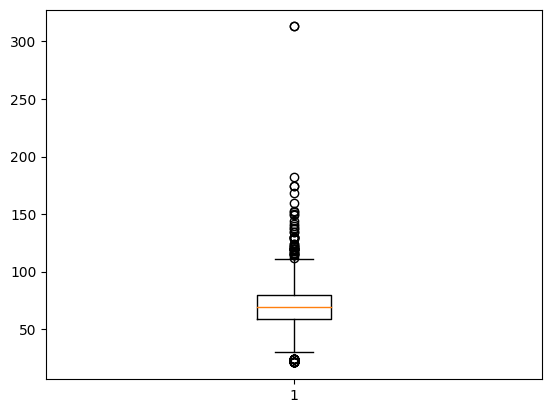

In [59]:
plt.boxplot(df1['LotFrontage'].dropna())

Finding Outliers

InterQuartile Range= Q3-Q1

Outliers are those which fall outside of (Q1 - (1.75*(Q3-Q1))) and (Q3 + (1.75*(Q3-Q1)))

In [61]:
q1=df1['LotFrontage'].quantile(0.25)
q3=df1['LotFrontage'].quantile(0.75)
iqr=q3-q1
df1=df1[~((df1['LotFrontage']<(q1-2*iqr)) |  (df1['LotFrontage']>(q3+2*iqr)))]

In [62]:
len(df1['LotFrontage'].isnull())

1434

(array([ 42.,  11.,  32.,  44.,  76.,  67., 183., 116., 147., 130., 141.,
         60.,  39.,  35.,  23.,  12.,  13.,   6.,   6.,   3.,   3.,   2.,
          3.,   1.,   0.,   1.,   2.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   2.]),
 array([ 21.  ,  26.84,  32.68,  38.52,  44.36,  50.2 ,  56.04,  61.88,
         67.72,  73.56,  79.4 ,  85.24,  91.08,  96.92, 102.76, 108.6 ,
        114.44, 120.28, 126.12, 131.96, 137.8 , 143.64, 149.48, 155.32,
        161.16, 167.  , 172.84, 178.68, 184.52, 190.36, 196.2 , 202.04,
        207.88, 213.72, 219.56, 225.4 , 231.24, 237.08, 242.92, 248.76,
        254.6 , 260.44, 266.28, 272.12, 277.96, 283.8 , 289.64, 295.48,
        301.32, 307.16, 313.  ]),
 <BarContainer object of 50 artists>)

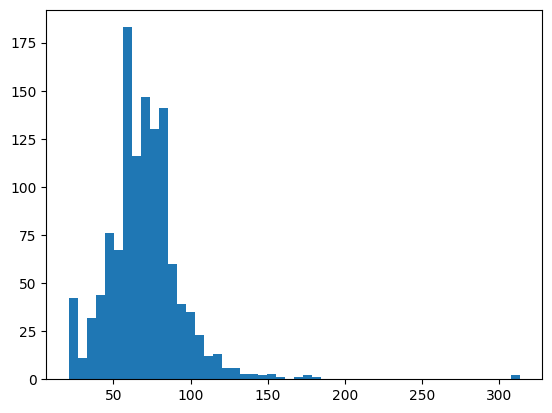

In [25]:
plt.hist(df1['LotFrontage'][~df1['LotFrontage'].isnull()].values,bins=50)

It's approximately a normal distribution , so filling missing values with mean of the column

In [65]:
df1['LotFrontage']=df1['LotFrontage'].fillna(df1['LotFrontage'].mean())

In [68]:
sum(df1['LotFrontage'].isnull())

0

MasVnrType, has around 856 null values, imputing using mode as it;s a caegorical variable , other possible steps would be , 
1. drop the col
2. Create a new category 'None' and fill missing values with it 
3. Predictive imputation (Use only if you know that the column is extremely useful)

In [79]:
df1['MasVnrType'].value_counts()

MasVnrType
BrkFace    439
Stone      124
BrkCmn      15
Name: count, dtype: int64

In [81]:
df1['MasVnrType'].mode()

0    BrkFace
Name: MasVnrType, dtype: object

In [82]:
df1['MasVnrType']=df1['MasVnrType'].fillna(df1['MasVnrType'].mode()[0])

In [83]:
sum(df1['MasVnrType'].isnull())

0

MasVnrArea has just 8 missing values

(array([1.055e+03, 2.190e+02, 9.300e+01, 2.800e+01, 1.700e+01, 6.000e+00,
        4.000e+00, 2.000e+00, 1.000e+00, 1.000e+00]),
 array([   0.,  160.,  320.,  480.,  640.,  800.,  960., 1120., 1280.,
        1440., 1600.]),
 <BarContainer object of 10 artists>)

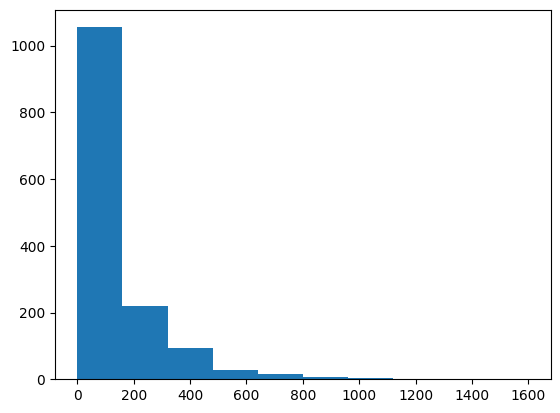

In [86]:
plt.hist(df1['MasVnrArea'])

In [88]:
sum(~df1['MasVnrArea'].isnull())

1426

In [89]:
df1=df1[~df1['MasVnrArea'].isnull()]

In [92]:
sum(df1['MasVnrArea'].isnull())

0

BsmtQual , categorical variable , 37 missing values , using mode to fill

In [100]:
df1['BsmtQual'].mode()[0]


'TA'

In [101]:
df1['BsmtQual']=df1['BsmtQual'].fillna(df1['BsmtQual'].mode()[0])

BsmtCond has 37 missing values, using mode to fill them 

In [107]:
df1['BsmtCond'].mode()

0    TA
Name: BsmtCond, dtype: object

In [108]:
df1['BsmtCond']=df1['BsmtCond'].fillna(df1['BsmtCond'].mode()[0])

In [112]:
df1['BsmtExposure'].value_counts()

BsmtExposure
No    934
Av    215
Gd    127
Mn    112
Name: count, dtype: int64

In [113]:
df1['BsmtExposure']=df1['BsmtExposure'].fillna(df1['BsmtExposure'].mode()[0])

In [116]:
df1['BsmtFinType1']=df1['BsmtFinType1'].fillna(df1['BsmtFinType1'].mode()[0])

In [119]:
df1['BsmtFinType2']=df1['BsmtFinType2'].fillna(df1['BsmtFinType2'].mode()[0])

In [123]:
df1['Electrical']=df1['Electrical'].fillna(df1['Electrical'].mode()[0])

In [127]:
df1=df1.drop(['FireplaceQu'],axis=1)

In [131]:
df1['GarageType']=df1['GarageType'].fillna(df1['GarageType'].mode()[0])

In [135]:
df1.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPo

Implies the house doesn't have a garage , so making it None for categorical and 0 for numerical to make it consistent across for house with no garage

In [138]:
df1[df1['GarageYrBlt'].isna()][[ 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond']]

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
39,Attchd,NaN,NaN,0,0,NaN,NaN
48,Attchd,NaN,NaN,0,0,NaN,NaN
78,Attchd,NaN,NaN,0,0,NaN,NaN
88,Attchd,NaN,NaN,0,0,NaN,NaN
89,Attchd,NaN,NaN,0,0,NaN,NaN
...,...,...,...,...,...,...,...
1349,Attchd,NaN,NaN,0,0,NaN,NaN
1407,Attchd,NaN,NaN,0,0,NaN,NaN
1449,Attchd,NaN,NaN,0,0,NaN,NaN
1450,Attchd,NaN,NaN,0,0,NaN,NaN


In [145]:
df1.loc[df1['GarageYrBlt'].isna(),['GarageType','GarageQual', 'GarageCond','GarageFinish']]='None'

In [147]:
df1.loc[df1['GarageYrBlt'].isna(),'GarageYrBlt']=0

In [150]:
df1[df1['GarageYrBlt']==0][[ 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond']]

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
39,None,0.0,None,0,0,None,None
48,None,0.0,None,0,0,None,None
78,None,0.0,None,0,0,None,None
88,None,0.0,None,0,0,None,None
89,None,0.0,None,0,0,None,None
...,...,...,...,...,...,...,...
1349,None,0.0,None,0,0,None,None
1407,None,0.0,None,0,0,None,None
1449,None,0.0,None,0,0,None,None
1450,None,0.0,None,0,0,None,None


In [154]:
df1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [164]:
cols_with_numerical_dtype=[]
for index,col in enumerate(df1.columns):
    print(f'{col} is of type {type(df1.loc[1,col])} with sample data of {df1.loc[1,col]} ')
    if type(df1.loc[1,col]) != type('gg'):
        cols_with_numerical_dtype.append(col)
         

Id is of type <class 'numpy.int64'> with sample data of 2 
MSSubClass is of type <class 'numpy.int64'> with sample data of 20 
MSZoning is of type <class 'str'> with sample data of RL 
LotFrontage is of type <class 'numpy.float64'> with sample data of 80.0 
LotArea is of type <class 'numpy.int64'> with sample data of 9600 
Street is of type <class 'str'> with sample data of Pave 
LotShape is of type <class 'str'> with sample data of Reg 
LandContour is of type <class 'str'> with sample data of Lvl 
Utilities is of type <class 'str'> with sample data of AllPub 
LotConfig is of type <class 'str'> with sample data of FR2 
LandSlope is of type <class 'str'> with sample data of Gtl 
Neighborhood is of type <class 'str'> with sample data of Veenker 
Condition1 is of type <class 'str'> with sample data of Feedr 
Condition2 is of type <class 'str'> with sample data of Norm 
BldgType is of type <class 'str'> with sample data of 1Fam 
HouseStyle is of type <class 'str'> with sample data of 1Stor

In [166]:
len(cols_with_numerical_dtype)

38

In [161]:
from sklearn.ensemble import RandomForestRegressor

In [162]:
df1.columns[:-1]

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPo

In [170]:
cols_with_numerical_dtype

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [171]:
model = RandomForestRegressor(n_estimators=100, random_state=0)
model.fit(df1[cols_with_numerical_dtype[:-1]], df1[df1.columns[-1]])

RandomForestRegressor(random_state=0)

In [168]:
df_test=pd.read_csv('test.csv')

In [175]:
df_test[cols_with_numerical_dtype[:-1]].isna().sum()

Id                 0
MSSubClass         0
LotFrontage      227
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea        15
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       2
BsmtHalfBath       2
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       78
GarageCars         1
GarageArea         1
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64

In [176]:

test_answers=model.predict(df_test[cols_with_numerical_dtype[:-1]])

ValueError: Input X contains NaN.
RandomForestRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values